In [1]:
import numpy as np # https://numpy.org/doc/stable/
import pandas as pd # https://pandas.pydata.org/docs/index.html
from sympy import latex
from IPython.display import Math, Latex # fancy display

# Задание 1. Титаник

### Открыть в Pandas файл titanic.csv (см. вложения). Ответить на вопросы ниже, используя средства языка Python и необходимых библиотек

In [2]:
csv_path = '~/Documents/HSE/ML/titanic.csv'
# csv_path = 'C:/HSE/titanic.csv'
# csv_path = 'titanic.csv'
df = pd.read_csv(csv_path, index_col=0, header=0) # dataframe

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Какое количество мужчин и женщин ехало на корабле?

In [4]:
q_people = len(df['Sex'])
len(df[df['Sex'] == "male"]['Sex']) # 1st method
q_man = df[df['Sex'].isin(['male'])].shape[0] # 2nd method
q_woman = df[df['Sex'].isin(['female'])].shape[0] # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html 

In [5]:
display(Math(f'Всего \ людей = {q_people}'))
display(Math(f'Всего \ мужчин = {q_man}'))
display(Math(f'Всего \ женщин = {q_woman}'))
# в google collab текст выдавался в Latex даже при функции Latex. В jupyter только при функции Math

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Какой части пассажиров удалось выжить? Посчитайте долю выживших пассажиров.

In [6]:
q_survived = len(df[df['Survived'].isin([1])]) # кол-во выживших
display(Math(f'Доля \ выживших = {round(q_survived/q_people, 3)}'))
# df['Survived'].mean() # Тоже посчитает долю выживших

<IPython.core.display.Math object>

### Какую долю пассажиры первого класса составляли среди всех пассажиров?


In [7]:
q_firstClass = len(df[df['Pclass'].isin([1])])
display(Math(f'Доля \ летевших \ в \ первом \ классе = {round(q_firstClass/q_people, 3)}'))

<IPython.core.display.Math object>


### Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.


In [8]:
age_mean = df['Age'].mean()
age_median = df['Age'].median()
display(Math(f'Средний \ возраст \ пассажиров = {round(age_mean, 1)}'))
display(Math(f'Медиана \ возрастов \ пассажиров = {round(age_median, 3)}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Коррелируют ли число братьев/сестер/супругов с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch.

In [9]:
corr = df[['SibSp', 'Parch']].corr(method='pearson') # default - pearson. There are also 'kendall', 'spearman''
display(corr)
corr = corr['Parch'][0].round(3)
print(corr, end='\t')
if abs(corr) < 0.5:
    print('слабая корреляция')
else:
    print('сильная корреляция')
# Sibsp - Number of Siblings/Spouses Aboard
# Parch - Number of Parents/Children Aboard

,SibSp,Parch
SibSp,1.000000,0.414838
Parch,0.414838,1.000000


0.415	слабая корреляция


### Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name).
### Это задание — типичный пример того, с чем сталкивается специалист по анализу данных. Данные очень разнородные и шумные, но из них требуется извлечь необходимую информацию. Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [10]:
df_female = df[df['Sex'] == 'female'] # df[df['Sex'].isin(['female'])]

In [11]:
df_female.head() # датафрейм всех женщин


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Анализ имён
Имена замужних женщин (Mrs.) находятся в скобках.

Все остальные имена вне зависимости от типа обращения к женщине находятся после самих обращений. То есть Miss. <имя>

In [12]:
# df_female[df_female["Name"].str.contains("Mrs\.")]

In [13]:
# Посмотрим сколько всего женщин
print(f'Всего\t {df_female.shape[0]}')
# Замужние (имена находятся в скобках)
df_mrs = df_female[df_female["Name"].str.contains("Mrs\.")]
print(f'Mrs.\t {df_mrs.shape[0]}')

# Остальные (имена находятся после точки)
df_others = df_female[~df_female["Name"].str.contains("Mrs\.")]

# df_others = df_female[~df_female['Name'].str.contains("Mrs\.|Miss")] # НЕ ЭКРАНИРОВАЛ ТОЧКУ
print(f'others\t {df_others.shape[0]}')


# df_others = df_female[df_female['Name'].str.contains('.\, [^Mrs.]', regex=True)]
# СЭМПЛЫ, ВЕДУЩИЕ К ОШИБКЕ
# df_both = df_female[df_female['Name'].str.contains('(?=.*Miss)(?=.*Mrs)', regex=True)]
# df_others = df_female[~df_female['Name'].str.contains('(?=.*Miss)(?=.*Mrs)', regex=True)]
#
# здесь кроется ошибка. Есть две женщины, которы обозначены и как замужние женщины, и как незамужние
# избавимся от них в общем пуле. Их имена мы считаем также как и имена других незамужних женщин
# display(df_both)

# display(df_others)
# display(df_others.shape[0])


Всего	 314
Mrs.	 125
others	 189


In [14]:
# rg = 'Mme\.|Ms\.|Mlle\.|Dr\.|Countess\.|Lady\.'
# df_others = df_female[df_female["Name"].str.contains(rg, regex=True)]
# display(df_others)

In [14]:
from collections import Counter
import re
cnt = Counter()
  
for sample in df_mrs['Name']:
    try:
        if '(' in sample:
    #         name = sample.split("(")[-1].split(" ")[0] # parse string alternative method
            name = re.search('\(\w+', sample).group().replace('(', '') # parse string
            print(name)
            cnt[name] += 1 # counter

        else:
    
            name = re.search('\.\s\w+', sample).group().replace('. ', '')
            print(name)
            cnt[name] += 1 # counter
            
    except AttribureError:
        print('!! ошибка')
#     cnt[name] += 1

display(cnt.most_common(5))
display(Math(f'Самые \ популярные \ женские \ имена \ на \ корабле \ {cnt.most_common(1)[0][0]}\ и\ {cnt.most_common(2)[1][0]}'))

Florence
Lily
Elisabeth
Adele
Mary
Emelia
Fatima
Selma
Marie
Johanna
Dorothy
Josefine
Myna
Elizabeth
Elizabeth
Maria
Ada
Grace
Mathilde
Sultana
Elin
Edith
Elizabeth
Edith
Anna
Johanna
Rosa
Margaret
Irene
Anna
Elna
Helena
Hanne
Gertrude
Lutie
Edith
Elizabeth
Rosa
Helen
Helene
Maria
Anna
Miriam
Margaretta
Sylvia
Ada
Emily
Clara
Mary
Catherine
Anna
Mantoura
Leila
Mary
Agnes
Jessie
Annie
Lulu
Anna
Ada
Florence
Alice
Emily
Esther
Marion
Ada
Marie
Hedwig
Jane
Bessie
Jane
Elizabeth
Amelia
Florence
Ida
Catherine
Ethel
Tillie
Emma
Alma
Charlotte
Alice
Maria
Marian
Martha
Amy
Juliette
Alfrida
Cordelia
Maria
Catherine
Juliet
Elizabeth
Augusta
Madeleine
Florence
Lillian
Margaret
Jane
Lucile
Anna
Mary
Eliza
Elisabeth
Vera
Mara
Rosalie
Charlotte
Bertha
Clara
Beila
Martha
Selini
Edwiga
Lilian
Leah
Mary
Latifa
Margaret
Karolina
Sallie
Hannah
Lily
Imanita
Margaret


[('Elizabeth', 6), ('Anna', 6), ('Mary', 5), ('Florence', 4), ('Maria', 4)]

<IPython.core.display.Math object>

In [ ]:
# regex = 'Dr.'
# df[df['Name'].str.match(regex)]

In [ ]:
# type(df.filter(like='Name', axis=1))
# display(df[df['Name'].str.contains('.\, [^Mrs]', regex=True)])

In [ ]:
# pd.set_option('display.max_rows', 50)
# df_female = df[df['Sex'] == 'female']
# reg = '.\, (the Countess|Lady|Mrs|Miss|Ms|Mme|Mlle|Dr)'
# display(df_female[df['Name'].str.contains(reg, regex=True)])
# display(len(df_female))

# Задание 2: Аппроксимация

Дана сложная математическая функция:

$f(x) = \sin({x \over 5})\cdot \exp({x \over 10})
+ 5\cdot \exp({-x \over 2}), x \in [1,15]$

Необходимо найти такую функцию $g(x)$, что $f(x) \approx g(x)$, 
но при этом $g(x)$ имеет более простую форму.
Очевидно, что можно выбрать многочлен в качестве функционала $g$.
Итак, пусть $g(x)$ является многочленом $n$ степени $(n>0)$.

Иначе говоря, задача состоит в поиске функции вида

$f(x) \approx g(x) = a_0 + a_1 x + ... + a_n x^n$

Так как любой полином однозначно определяется по любым $n+1$
различным точкам, через которые он проходит, то для нахождения 
набора коэффициентов $a_i$ необходимо решить следующую СЛАУ:

$
\begin{equation}
\begin{cases}
a_0 + a_1 x_0 + a_2 x_0^2 + ... + a_n x_0^n = f(x_0)   \\
a_0 + a_1 x_1 + a_2 x_1^2 + ... + a_n x_1^n = f(x_1)   \\
...\\
a_0 + a_1 x_n + a_2 x_n^2 + ... + a_n x_n^n = f(x_n)   \\
\end{cases}
\end{equation}
$


#### Сформулируйте систему линейных уравнений (то есть задайте матрицу коэффицинетов $A$ и свободный вектор $\vec b$) для многочлена первой степени, который  должен совпадать с функцией $f(x)$ в точках $1$ и $15$. Решите данную систему с помощью функции $\textbf{scipy.linalg.solve}$. Нарисуйте функцию $f(x)$ и полученный многочлен. Хорошо ли он приближает исходную функцию?

In [15]:
# imports
import scipy.linalg as LA # solve system of linear equations
import sympy # fancy matrices
import matplotlib.pyplot as plt # plotting

# initial function
def f(x):
    return np.sin(x / 5.0) * np.exp(x / 10.0) + 5 * np.exp(-x / 2.0)

In [16]:
x_0, x_1 = 1, 15
X = np.array([
    [np.power(x_0, 0), np.power(x_0, 1)],
    [np.power(x_1, 0), np.power(x_1, 1)]
            ])
b = np.array([
    f(x_0),
    f(x_1)
            ])
A = LA.solve(X, b)
# check
# print(np.dot(X, A) == b)
print(np.isclose(np.dot(X, A), b))

display(Math(f'{latex(sympy.Matrix(X))} \cdot {latex(sympy.Matrix(np.round(A, 3)))}  \
= {latex(sympy.Matrix(np.round(b, 3)))}'))

[ True  True]


<IPython.core.display.Math object>

In [17]:
display(Math(f'{latex(sympy.Matrix(np.dot(X, A)))}, {latex(sympy.Matrix(b))}'))

<IPython.core.display.Math object>

In [18]:
# print(A)
def approx_f1(x):
    return A[0] * np.power(x, 0) + A[1] * np.power(x, 1)

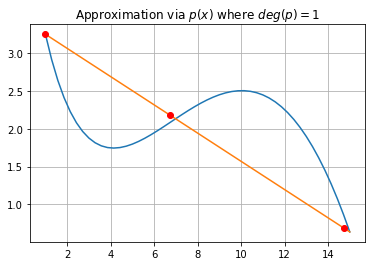

In [19]:
X_0 = np.linspace(1, 15)
plt.grid(True)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400
# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "Helvetica"
# })
plt.plot(X_0, f(X_0), X_0, approx_f1(X_0))
plt.title('Approximation via $p(x)$ where $deg(p) = 1$')
idx = np.argwhere(np.diff(np.sign(f(X_0) - approx_f1(X_0)))).flatten()
plt.plot(X_0[idx], approx_f1(X_0)[idx], 'ro')
plt.show()

# plt.rc('font', family='serif')


# plt.xlabel(r'\textbf{time} (s)')
# plt.ylabel(r'\textit{voltage} (mV)',fontsize=16)

Из графика видим, что приближение достаточно низкого качеста.

#### Повторите те же шаги для многочлена второй степени, который совпадает с функцией $f$ в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?

[ True  True  True]


<IPython.core.display.Math object>

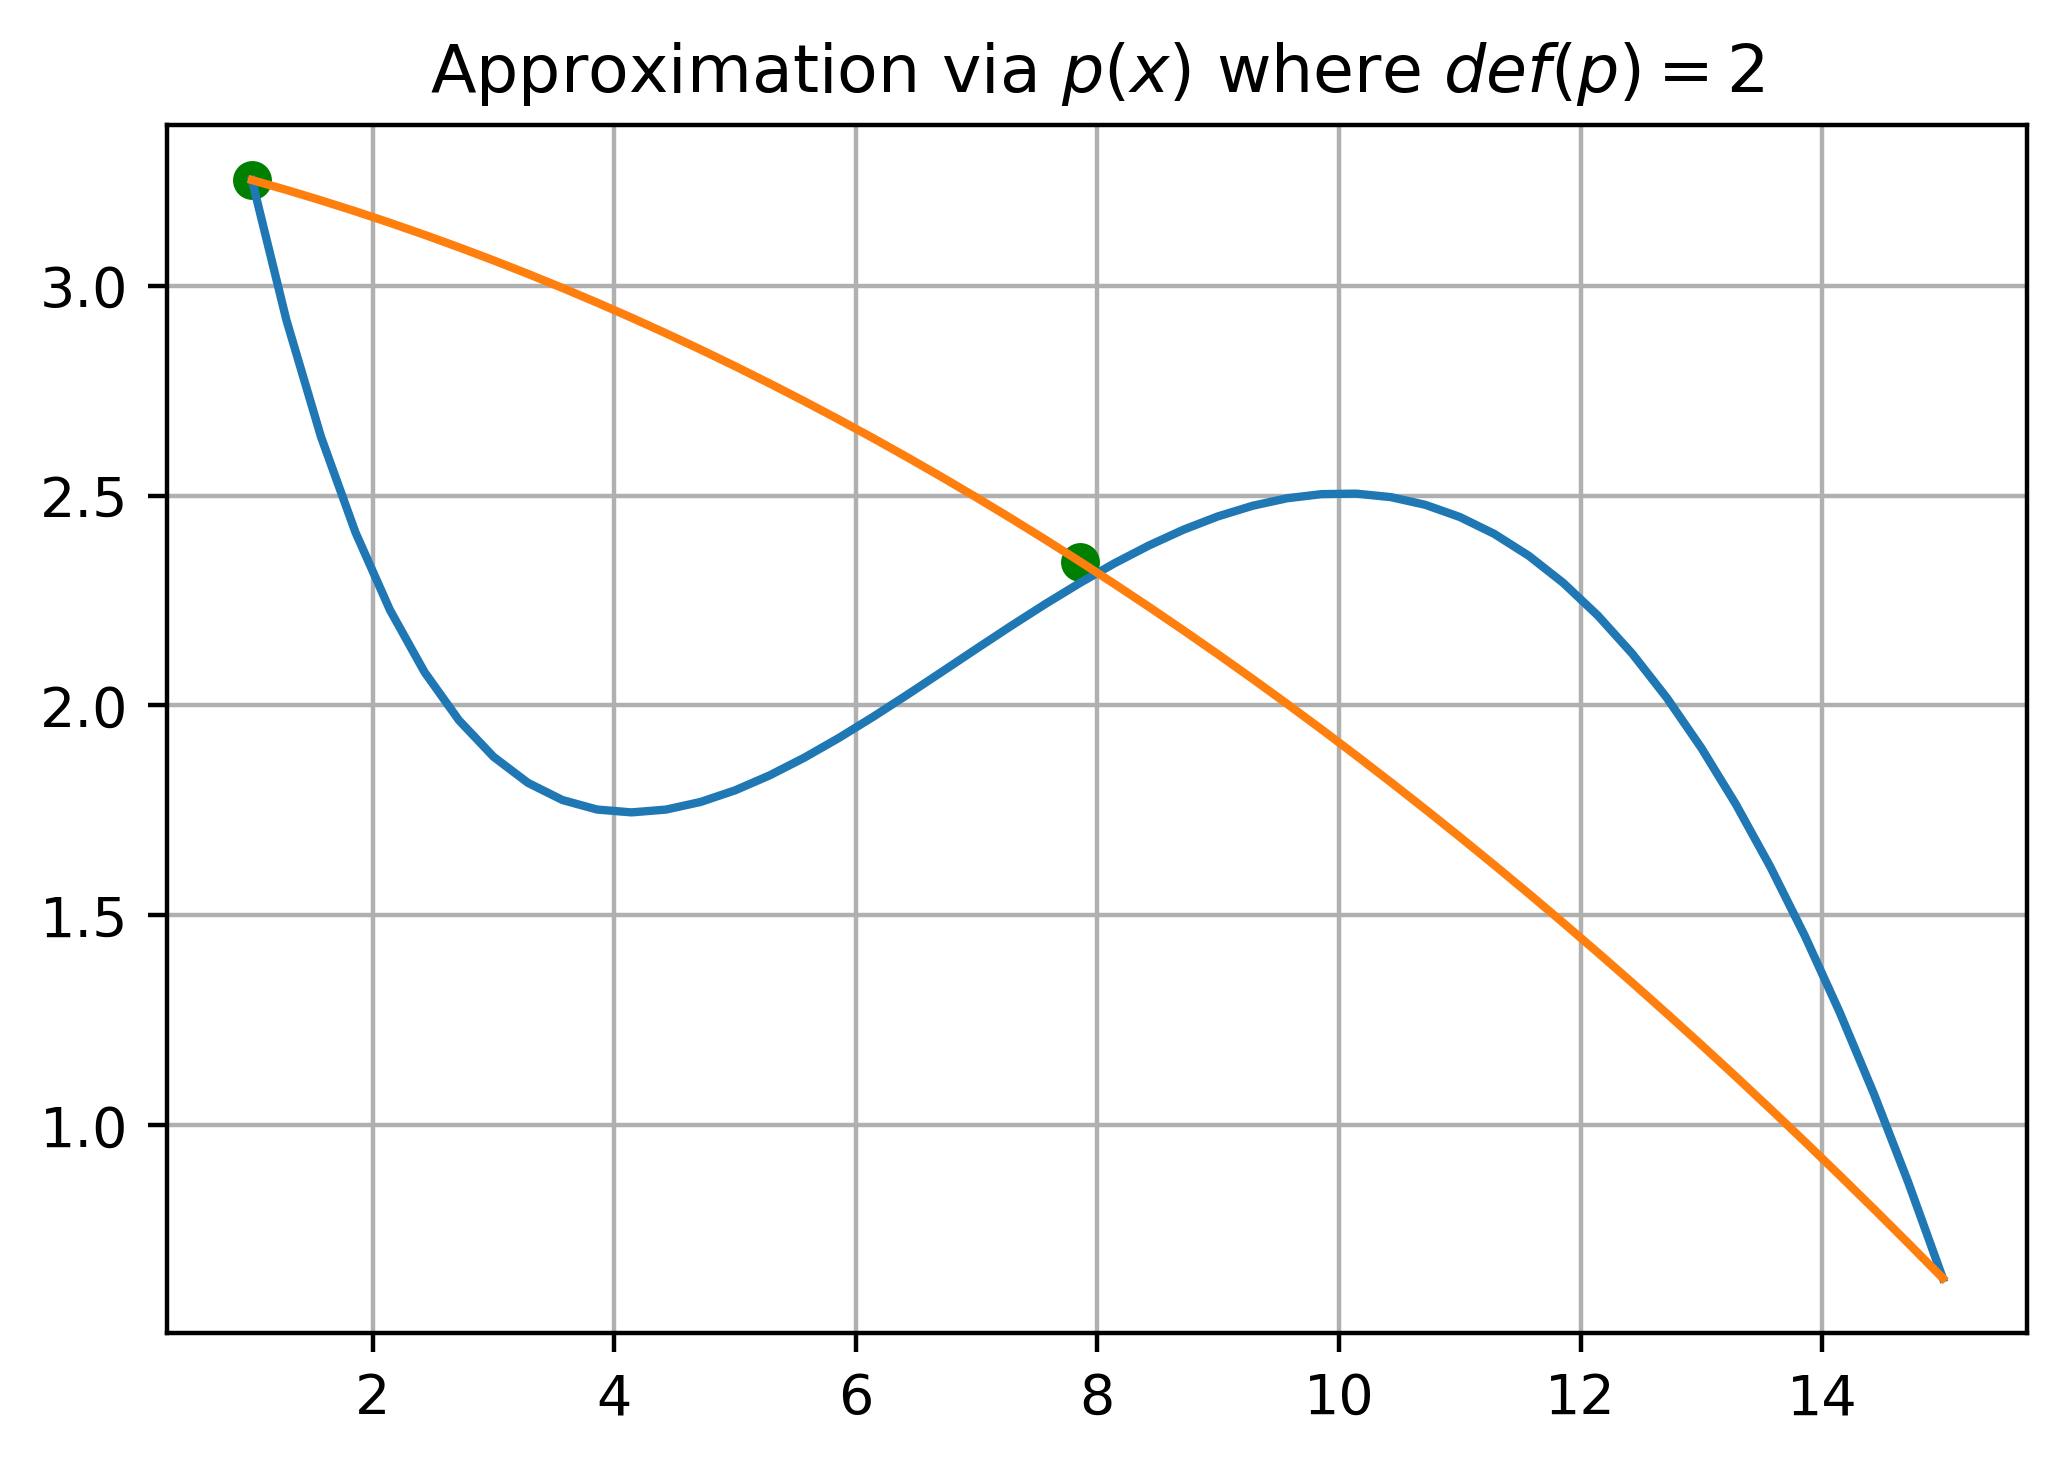

In [20]:
x = [1, 8, 15]
X = np.array([
    [np.power(x_i, i) for i in range(0, len(x))] for x_i in x
            ])
# display(Math(f'{latex(sympy.Matrix(X))}'))
b = [f(x_i) for x_i in x]
A = LA.solve(X, b)
# check
print(np.isclose(np.dot(X, A), b))
display(Math(f'{latex(sympy.Matrix(np.dot(X, A)))}, {latex(sympy.Matrix(b))}'))

def approx_f2(x):
    return A[0] * np.power(x, 0) + A[1] * np.power(x, 1) + A[2] * np.power(x, 2)

plt.grid(True)
plt.title('Approximation via $p(x)$ where $def(p) = 2$')
idx = np.argwhere(np.diff(np.sign(f(X_0) - approx_f2(X_0)))).flatten()
plt.plot(X_0[idx], approx_f2(X_0)[idx], 'go')
plt.plot(X_0, f(X_0), X_0, approx_f2(X_0))
plt.show()

Параболообразный график мы приблизили полиномом второй степени. Теперь аппроксимация выглядет намного лучше.

[ True  True  True  True]


<IPython.core.display.Math object>

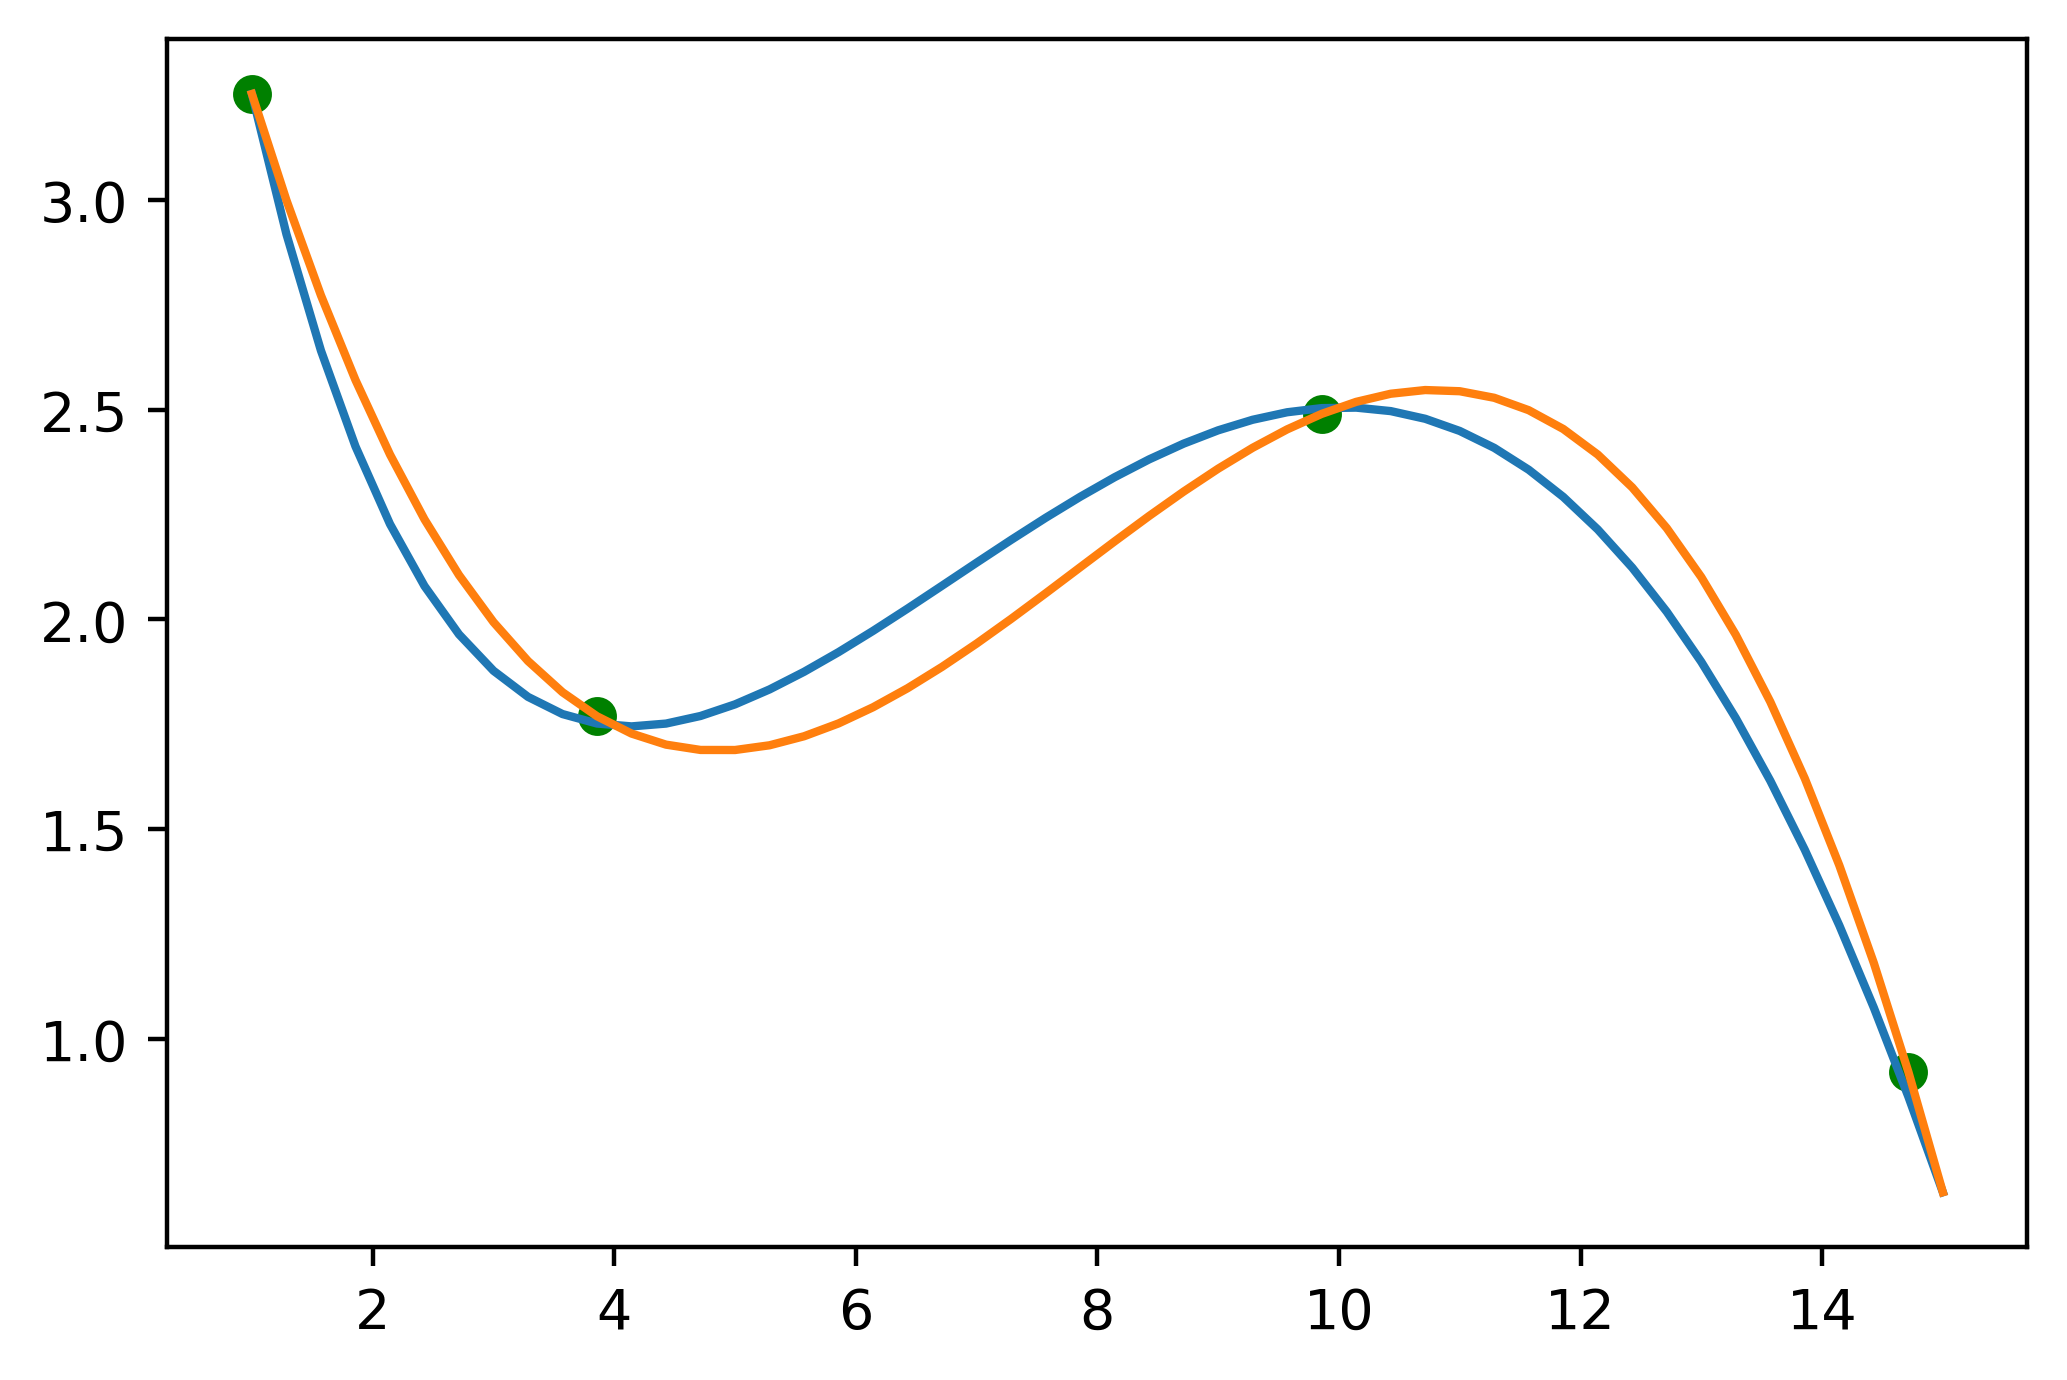

In [21]:
x = [1, 4, 10, 15]
X = np.array([
        [np.power(x_i, i) for i in range(0, len(x))] for x_i in x
            ])
b = [f(x_i) for x_i in x]
A = LA.solve(X, b)
# check
print(np.isclose(np.dot(X, A), b))
display(Math(f'{latex(sympy.Matrix(np.dot(X, A)))}, {latex(sympy.Matrix(b))}'))


def approx_f3(x):
    return A[0] * np.power(x, 0) + A[1] * np.power(x, 1) + A[2] * np.power(x, 2) + \
        A[3] * np.power(x, 3)

idx = np.argwhere(np.diff(np.sign(f(X_0) - approx_f3(X_0)))).flatten()
plt.plot(X_0[idx], approx_f3(X_0)[idx], 'go')
plt.plot(X_0, f(X_0), X_0, approx_f3(X_0))
plt.show()

# print(f'np.linalg.solve:\nx = {x1_approx.flatten()}')

Аппроксимация выглядит идеально.